# Random Sample Imputation

1. **Good for Linear Models**
2. **Bad for Tree based Models**

- Here the varaince and distribution of data remain same which make it better than the other techniques like mean, median, arbitrary etc.

**Limitations**
- The covariance with other attributes gets disturbed that is because we introduce randomnes in data.
- Memeory heavy for deployment, as we need to store orignal training set to extract values from and replace N/A in comming observations.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 2), (712,), (179, 2), (179,))

In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


### Remove the missing values from Age column and extract the number of values equal to missing values and fill in.

In [10]:
mask = X_train['Age_imputed'].isnull()
mask[:5]

30     False
10     False
873    False
182    False
876    False
Name: Age_imputed, dtype: bool

In [11]:
mask.sum()

148

In [12]:
def fare_based_age_impute(row):
    if pd.isnull(row['Age']):
        same_fare_ages = X_train.loc[
            (X_train['Fare'] == row['Fare']) & 
            (X_train['Age'].notnull()),
            'Age'
        ]
        if len(same_fare_ages) > 0:
            return same_fare_ages.sample(1).values[0]
        else:
            return X_train['Age'].dropna().sample(1).values[0]
    return row['Age']

X_train['Age_imputed'] = X_train.apply(fare_based_age_impute, axis=1)

In [13]:
def fare_based_age_impute(row):
    if pd.isnull(row['Age']):
        same_fare_ages = X_test.loc[
            (X_test['Fare'] == row['Fare']) & 
            (X_test['Age'].notnull()),
            'Age'
        ]
        if len(same_fare_ages) > 0:
            return same_fare_ages.sample(1).values[0]
        else:
            return X_test['Age'].dropna().sample(1).values[0]
    return row['Age']

X_test['Age_imputed'] = X_test.apply(fare_based_age_impute, axis=1)

In [14]:
X_train.Age.isnull().sum(),X_train.Age_imputed.isnull().sum(), X_test.Age.isnull().sum(),X_test.Age_imputed.isnull().sum()

(148, 0, 29, 0)

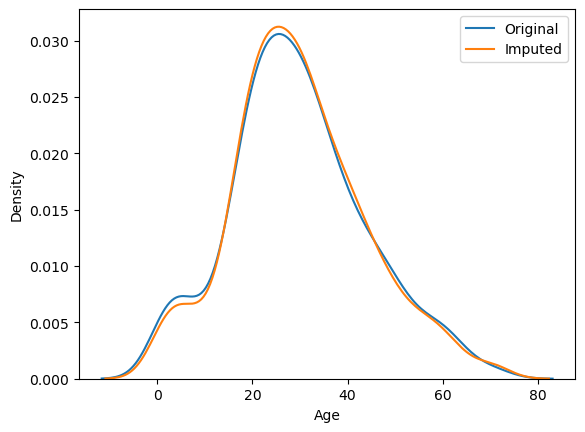

In [15]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [16]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  196.21229682754137


In [17]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,70.075654
Age,71.512440,204.349513,204.349513
Age_imputed,70.075654,204.349513,196.212297


<Axes: >

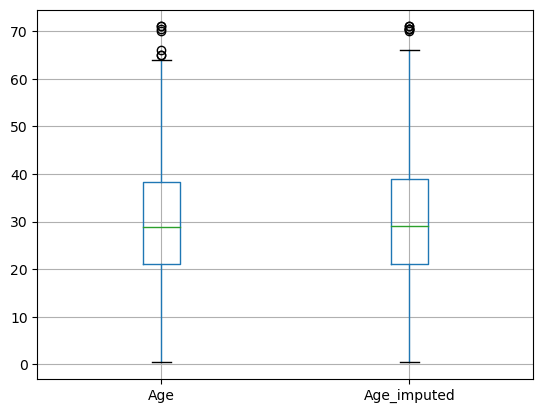

In [18]:
X_train[['Age', 'Age_imputed']].boxplot()

- This technique has now impact on outliers both before and after the imputation the ouliers are same.

In [19]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,20.0
493,71.0,49.5042,71.0
527,NaN,221.7792,24.0


# Random Sample Imputation For Categorical Data

In [20]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [21]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [22]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [23]:
X = data
y = data['SalePrice']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
617,NaN,TA,105500,TA,NaN
422,NaN,TA,113000,TA,NaN
1024,Gd,TA,287000,TA,Gd
124,TA,TA,181000,TA,TA
1317,Gd,TA,208900,TA,Gd


In [27]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Kashif Khan\AppData\Local\Temp\ipykernel_5100\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Kashif Khan\AppData\Local\Temp\ipykernel_5100\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Kashif Khan\AppData\Local\Temp\ipykernel_5100\856878696.py:4: SettingWithCop

In [28]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [29]:
temp

,original,imputed
TA,0.951043,0.947774
Fa,0.037171,0.039384
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.001712


- less change in freuencies so we can use this technique to fill the null values.

In [30]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.538721
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.031425


- the change in frequency if greater between Orignal and imputed attribute therefore we would not prefer this technique for this column.

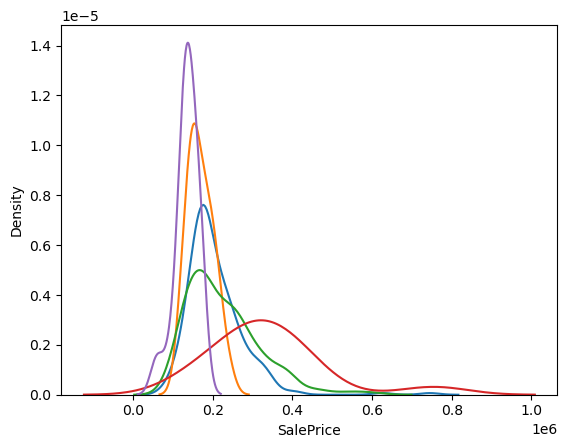

In [31]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

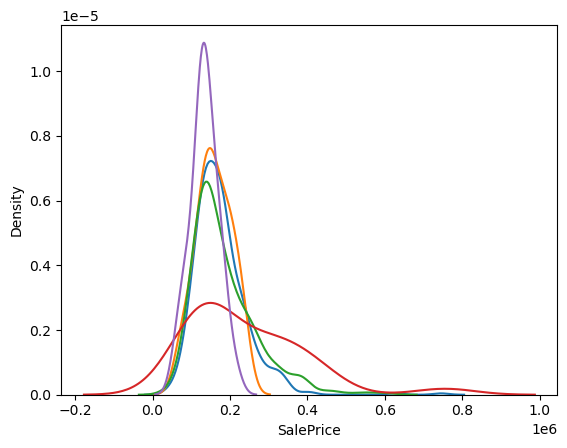

In [32]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()

- we can see that the distribution has been changed therefore we can not use this technique to fill null values using Random Sample Imputation Technique.